In [1]:
import numpy as np
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import *
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (10.0, 7.5)
matplotlib.rcParams['font.size'] = 16

Define a synthetic function that we want to fit. We'll later add a bit of noise to it.

In [2]:
def f(x):
    return 1.0 + x/2.0 + np.sin(x)

In [3]:
data_end = 10
data_fineness = 50

pred_end = 12
pred_fineness = 1000

X = np.atleast_2d(np.linspace(0, data_end, data_fineness)).T
y = f(X).ravel()

dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)*0.4

y += noise

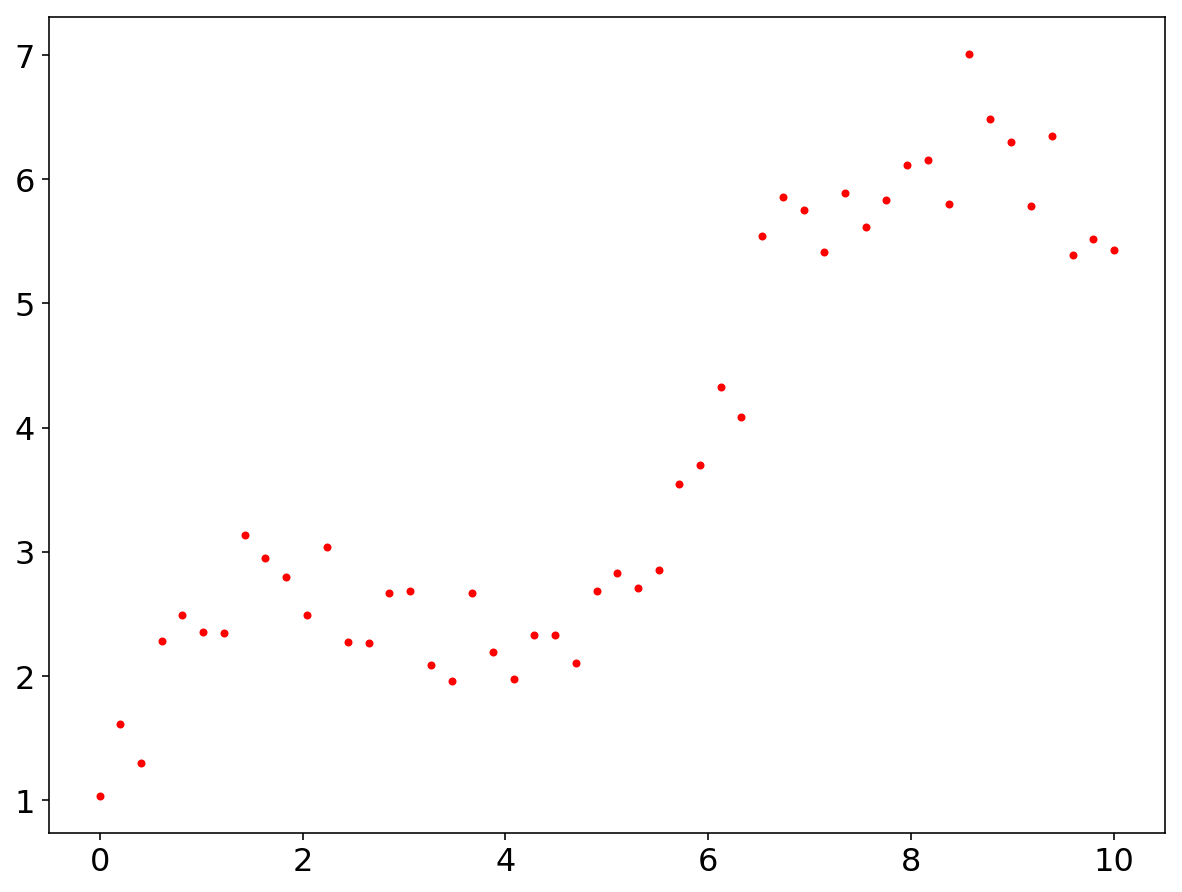

In [4]:
plt.plot(X, y, 'r.')

In [5]:
gp_kernel = Product(DotProduct(), ExpSineSquared(1, 10.0)) + WhiteKernel()
gp = gaussian_process.GaussianProcessRegressor(kernel=gp_kernel, normalize_y=True)

In [6]:
gp.fit(X, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=DotProduct(sigma_0=1) * ExpSineSquared(length_scale=1, periodicity=10) + WhiteKernel(noise_level=1),
             n_restarts_optimizer=0, normalize_y=True,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [7]:
x = np.atleast_2d(np.linspace(0, pred_end, pred_fineness)).T

In [8]:
y_pred, y_std = gp.predict(x, return_std=True)
y_std = y_std*2

In [9]:
x_ = np.atleast_2d(np.linspace(0, pred_end, pred_fineness)).T
y_ = f(x_).ravel()

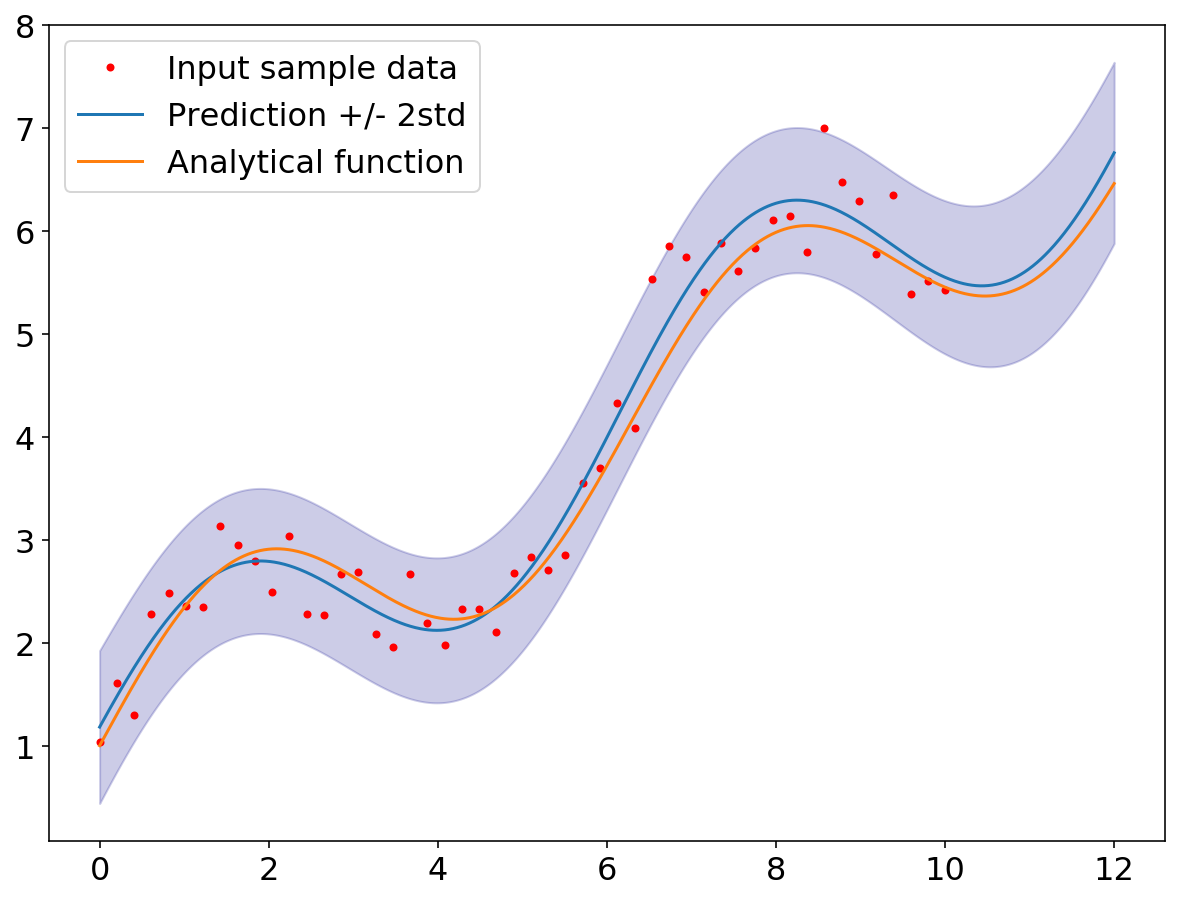

In [10]:
plt.plot(X, y, 'r.', label='Input sample data')
plt.plot(x, y_pred, label='Prediction +/- 2std')
plt.plot(x_, y_, label='Analytical function')
plt.fill_between(x[:, 0], y_pred - y_std, y_pred + y_std, color='darkblue', alpha=0.2)
plt.legend(loc='upper left')
plt.show()